## Zero de Funções

Seja $f$ uma função contínua no intervalo $[a,b]$, queremos encontrar soluções para a equação não-linear:

$$f(x) = 0$$

Todos os valores que satisfazem essa equação acima são chamados de raízes ou zero da $f(x)$ e serão denotadas por $\alpha$

Vamos utilizar métodos iterativos para encontrar essas raízes, como é uma equação não-linear, não existe um número determinado de raízes.

### Método iterativo

Para resolver equações de grau 2 e 3 até existem métodos para resolução de equações mas quando o grau vai crescendo não temos uma forma analítica de resolver.

Então precisa ser resolvido por um método iterativo, ou seja, dado um chute inicial $x_{0}$, gerar uma sequência de iterados que queremos que convirja para uma raiz da função. Assim não encontramos uma solução exata mas sim uma aproximação dela.

**Para isso, precisamos:**

1) Determinar um intervalo que contenha essa raiz $\alpha$

Pelo teorema do valor intermediário (TVI), se a função for contínua no intervalo $[(a,b)]$ e a $f(a)$ e $f(b)$, funções variadas no extremos, tem sinais diferentes então vai existir um $\alpha$ no interior desse intervalo tal que $f(\alpha)$ é 0, ou seja, Se $f \in C([a,b]$ e $f(a)f(b)<0 \Rightarrow \exists \alpha \in (a,b)$.

2) Analisar o gráfico para determinar esse intervalo que possui a raiz

**Critério de parada**

Critério de parada é o critério que ao ser atingido o processo iterativo é finalizado. Nesse caso $\varepsilon$ e $\tau$ são valores pré-definidos pelo usuário.Lembrando que os critérios abaixo podem ser combinados:

1) Número de iterações, ao satisfazer a condição abaixo o processo é finalizado:

$$k = k_{max} $$

2) Erro absoluto, ao satisfazer a condição abaixo o processo é finalizado:

$$\left | x^{(k+1)} - x^{(k)}\right | < \varepsilon $$

3) Erro relativo, mais robusto que o anterior, usado quando não quer levar em conta a ordem de grandeza, ao satisfazer a condição abaixo o processo é finalizado:

$$\frac{\left | x^{(k+1)} - x^{(k)}\right |}{x^{(k+1)}}<\varepsilon $$

4) Teste de resíduo, a precisão não é garantida, ao satisfazer a condição abaixo o processo é finalizado:

$$\left | f(x_{k})\right | < \tau  $$

### Métoda da bisseção

Esse método é baseado no TVI, pois sabemos que em determinado intervalo se os a função nos extremos tiverem sinais diferentes então com certeza a curva corta o eixo $x$.

**Passo-a-Passo**

### imagem

1) Ao plotar o gráfico observa o intervalo $[(a,b)]$ em que a função é continua e corta o eixo $x$ <br>
2) Divide o intervalo ao meio, se o resultado for positivo: o valor do extremo em que a função é positiva recebe esse novo valor. Já se for negativo: o valor do extremo em que a função é negativa recebe esse novo valor. Sempre mantendo um dos valores do intervalo com sinais diferentes<br>
3) Repete cada passo até atingir o critério de parada estabelecido<br>


**Vantagens:**

- Facil implementação
- Seguro, se passa o intervalo certo
- Sempre vai convergir para uma raiz
- Requer apenas que seja continuo e mude de intervalo

**Desvantagens:**

- Lento 
- Difícil de generalizar para sistemas de equações nao lineares

**Teorema que garante a convergência**

Suponha $f \in \mathcal{C}([a,b])$ e $f(a)f(b)<0$. O método da bisseção gera uma
sequência ${x0, x1, . . .}$ que se aproxima de uma raiz $\alpha$ de $f$ com:
$$\left| x_{k} − \alpha \right| \leq \frac{b − a}{2^{k}}$$

**Número de iterações**

Usando esse teorema podemos estimar o número de iterações ($k$) que vamos precisar para determinada tolerância:

Queremos que $x_{k} - \alpha < \varepsilon$, ou seja, a distância do valor encontrado para a raiz real seja do $\varepsilon$ dado.

- Utilizando o teorema, sabemos que $x_{k} - \alpha < \varepsilon \leq \frac{b − a}{2^{k}}$<br>
- Supondo a igualdade e aplicando $\log$ temos: $\log_{2}\varepsilon = \log_{2}\frac{b − a}{2^{k}}$. <br>
- Utilizando a propriedade de $\log$ temos que $\log_{2}\varepsilon = \log_{2}(b − a) - \log_{2}2^{k} \Leftrightarrow \log_{2}\varepsilon = \log_{2}(b − a) - k$. 
- Isolando k conseguimos estimar que a expressão que estima o número de iterações é $k = \log_{2}(b − a) - \log_{2}\varepsilon$ 


In [31]:
import numpy as np
import math 

In [377]:
def bissecao(funcao,a,b,tol = 1e-6, kmax = 500):
    
    #calcula o valor médio
    x = (a+b)/2
    erro = np.inf
    k = 0
    
    while(erro > tol and k < kmax):
        
        # se a e x tem sinais contrários
        if(funcao(a)*funcao(x)<0):
            b = x
        # se a e x tem sinais diferentes
        else:
            a = x
        
        x0 = x
        x = (a + b)/2 
        erro = abs(x-x0)
        k = k + 1
    
    return x,k


In [381]:
f = lambda x: x**3 + 3*x**2 + 3*x + 4
a = -5; b = 0; tol = 1e-6;

x,k = bissecao(f,a,b)

k_estimado = math.log(b-a,2) - math.log(tol,2)
print(f"Número de iterações realizadas:{k} \nNúmero de iterações estimada:{k_estimado}")


Número de iterações realizadas:22


### Método de Ponto Fixo

O problema de encontrar $f(x) = 0$ pode ser reescrito na forma  $g(x) = x $, ou seja, agora queremos encontrar o ponto fixo, isto é um ponto $\alpha$ que satisfaz a equação  $g(\alpha) = \alpha$.

Várias maneiras de escrever $g(x) = x$ a partir da $f(x)$:

-  Podemos escrever da forma $g(x) = x - \lambda f(x)$ onde \lambda é um real qualquer, já que se $x$ for $\alpha$, e $f(\alpha) = 0$ então chegamos em $g(x) = x$;\
-  Podemos escrever da forma $g(x) = x - \frac{f(x)}{f'(x)}$(se a $f(x)$ for derivável e não se anulo, ou seja, $f'(x)$ existe e $f'(x)\neq 0$, a forma que utilizamos para o Método de Newton. Pode ser escrita pela mesma explicação da forma acima.

#### Método

1) Dada um função real $f(x)$. Escolha uma função $g(x)$ tal que $f(x) = 0 \Leftrightarrow x = g(x)$, ou seja, encontrar o zero da $f(x)$ que é o ponto fixo da $g(x)$. Podemos escolher várias $g(x)$ possíveis mas dependendo da escolhida pode convergir mais rápido ou mais devagar ou pode até nao convergir.

2) Chuta um valor inicial $x_{0}$

3) Começa o processo iterativo $x_{k+1} = g(x_{k})$, para $k = 1,2,3 ..$, então vamos utilizar o x anterior para calcular o novo valor.

4) Quando $x_{k+1}$ satisfazer algum dos critérios de parada acaba o processo

Podemos demonstrar esse processo graficamente através do gif abaixo:

<img src="snl_imagens/ponto_fixo.gif" width="370" align="left" >
<br><br>
  1) Dado o $x_{0} = 5$, vai paralelamente ao eixo $x$ até a reta $y = x$, ou seja, dado o x qual o valor do $x_{k+1}$;<br><br>
  
  2) Depois vai paralelamente ao eixo y até nossa $g(x)$, ou seja, aplicar na nossa $g(x)$ esse novo valor de $x$;<br><br>
  
  3) Repete o processo e com o tempo irá convergindo para o ponto em que as dois gráficos se encontrarm que é justamente $ x = g(x)$

<br><br><br><br>

**Teorema**: Considere o Método do Ponto Fixo $x_{k+1} = g(x_{k}) k = 1,2,3 ..$.

1) Se $g \in \mathcal{C}([a,b])$ e $g(x) \in [a, b]$, para todo $x \in [a, b]$, então existe um ponto fixo $\alpha \in [a, b]$ de $g(x)$ (Ou seja, para todo valor de $x$ que está no intervalo o $g(x)$ continua no intervalo.<br><br>
2) Se, adicionalmente, a derivada $g'(x)$ existir e se houver uma constate ($\rho  < 1)$, tal que: <br><br>$$\left|g'(x)\right| \leq \rho \forall x \in (a, b),$$ então o ponto fixo $\alpha$ é único e a sequência gerada converge para $\alpha$ independente da escolha do $x_{0} \in [a,b]$.

# Taxa de convergencia



## Método de Newton

É um método de ponto fixo, e a ideia é linearizar a função em torno de $x_{k} \approx \alpha$, sendo $\alpha$ minha raiz

Para esse método $f(x)$:
- Função que buscamos a raiz $\alpha$ deve ser diferenciável.
- A derivada deve ser simples de ser calculada comparada com a $f(x)$ se não teriam que ser feitas muitas regras da cadeia deixando custoso

Expandindo pela Fórmula de Taylor $f(x)$ em torno do ponto $x_{k}$, conseguimos a expressão:<br><br>
$$f(x) \approx f(x_k) + f'(x_k)\cdot(x-x_k)$$
Substituindo $x$ por $\alpha$, todos os termos $f(\alpha)$ ficam 0 e ao isolar $\alpha$ ficamos com a expressão:<br><br>
$$\alpha \approx x_k - \frac{f(x_k)}{f'(x_k)}$$

Vamos utilizar essa expressão para ser justamente nossa $g(x)$ que falamos no método do ponto fixo, nota-se assim que $\alpha = g(\alpha)$, pois na expressão fica $g(\alpha) = \alpha + \underset{0}{\underbrace{\frac{f(\alpha)}{f'(\alpha)}}}$.

#### Processo iterativo

Da mesma forma que o processo do ponto fixo o processo iterativo do método de newton segue a expressão, com o objetivo de $x_{k+1}$ convergir para o nosso $\alpha$:<br><br>
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, k = 0, 1, ...(*)$$ 


**Passo a passo:**
<br><br>
1) Chuta um $x_0$
2) Para k = 0, 1... calcula o $x_{k+1}$ seguindo o a expressão *
3) Ao atingir um critério de parada o processo acaba
<br>
O processo é basicamente é pegar o ponto $x_0$, aplicar a f(x) para ver o resultado, pega a derivada desse ponto e calcula a intersecção desse ponto no eixo $x_1$. O ponto onde foi a intersecção é o nosso próximo iterado.
Repetimos o processo aplicamos a $f(x)$ no ponto, calcula a derivada e vê onde a tangente corta o eixo $x_3$.

Para funcionar precisa escolher um bom x_{0}, dependendo pode não convergir

**Vantagens**
- Facil implementar
- A generalização para sistemas de equação é trivial
- Convergencia rápida, converge quadraticamente

**Desvantagens**

- Dependendo do $x_0$ pode não convergir
- Requer o cálculo da derivada
- A função pode nao ser diferenciavel

In [395]:
def newton(funcao,dfuncao,x0,tol = 1e-6, kmax = 500):
    
    k = 0
    x = x0 
    erro = np.inf
    
#     print('\nMétodo de newton\n')
    
    while(k < kmax and erro > tol):
        
        dx = (funcao(x)/dfuncao(x))
        x = x - dx
        erro = abs(dx)
        k = k + 1
#         print(f"it:{erro}")
        
    if(k == kmax):
        return np.nan, k
    else:
        return x, k


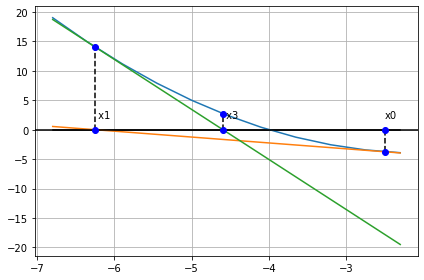

In [451]:
## Plot para o método de newton

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

x_array = np.linspace(start=-6.8, stop=-2.3, num=11, endpoint=True)

y_ = [x**2+4*x for x in x_array] 
y = [(-1*(x-(-2.5))-3.75) for x in x_array]
y2 = [(-8.5*(x-(-6.25))+14.0625) for x in x_array]

x_axis = np.zeros(11)


plt.axhline(y=0, color='k')
plt.grid(True, which='both')
plt.plot(x_array, y_)
plt.plot(x_array,y)
plt.plot(x_array,y2)


plt.plot(x_array, x_axis, 'black')
plt.plot(-2.5,0 , 'bo')
plt.plot(-2.5,-3.75 , 'bo')
plt.plot(-6.25, 0, 'bo')
plt.plot(-6.25,14.0625, 'bo')
plt.plot(-4.595588235294118, 0, 'bo')
plt.plot(-4.595588235294118,2.7370782871972317,'bo')


plt.annotate('x0\n',(-2.5,0))
# axes[1].annotate(' ',(-2.5,-3.75))
plt.annotate(' x1\n',(-6.25,0))
# axes[1].annotate('2\n',(-6.25,14.0625))
plt.annotate(' x3\n',(-4.595588235294118, 0))
# axes[0,1].annotate('4\n',(-4.595588235294118, 2.7370782871972317))

plt.vlines(-2.5, 0, -3.75, linestyles='dashed')
plt.vlines(-6.25, 0, 14.0625, linestyles='dashed')
plt.vlines(-4.595588235294118, 0, 2.7370782871972317, linestyles='dashed')

plt.tight_layout()

plt.show();

## Método da Secante

É justamente o método de newton, sem calcular a derivada pois vamos aproxima ela a diferença finita abaixo:<br><br>
$$f'(x_k) \approx\frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$

Depois só substituir na equação que utilizamos para o método de newton esse valor aproximado da derivada e ficamos com:<br><br>

$$x_{k+1} = x_k - f(x_k)\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}$$

**Vantagem comparado com o método de newton**
- Não é preciso calcular a derivada, 

**Desvantagens comparado com o método de newton**

- É preciso dois chutes iniciais
- A convergência é um pouco mais lenta

### Convergência 

**Definição (ordem de convergência)**<br><br>
Seja ${x_k}$ uma sequência obtida por um método iterativo tal que $x_k \rightarrow x$, com $x \neq
x_k, \forall k$. Se existirem um número $p \leq 1$ e uma constante $c >$ 0 tais que:<br><br>
$$\lim_{k \rightarrow \infty} \frac{(\left|x_{k+1} − x \right|}{\left|x_k − x \right|)^p} = c,$$<br>
então $p$ é a ordem de convergência desse método.

**Analisando valores**<br>

Quanto maior o $p$ maior a taxa de convergência

1) Se $p = 1$ (e $c < 1$), o método possui convergência linear;<br>
2) Se $p = 2$, o método possui convergência quadrática (Método de Newton), significa dobrar em cada iteração a precisão da raiz;<br>
3) Se $p \approx 1.6$, o metodo possui convergência super linear (Método da Secante).<br>


#### Teoremas 

**Teorema (convergência do Método de Newton)**<br>
Se $f \in C^2 ([a, b])$ e existir $\alpha \in [a, b]$, tal que $f(\alpha) = 0$ e $f'(\alpha)\neq 0$, então
existe $\delta > 0$ tal que a sequência ${x_k}$ gerada pelo Método de Newton converge quadraticamente para $\alpha, \forall x_0 \in (\alpha − \delta, \alpha + \delta)$.<br>(Ou seja, para todo $x_0$ suficientemente perto da raiz a convergência quadrática irá acontecer, se estiverem na condições acima, bom plotar para ter um bom chute inicial)

**Teorema (convergência do Método da Secante)**<br>

Se $f \in C^2 ([a, b])$ e existir $\alpha \in [a, b]$, tal que $f(\alpha) = 0$ e $f'(\alpha)\neq 0$, então
existe $\delta > 0$ tal que a sequência ${x_k}$ gerada pelo Método da Secante converge super linearmente para $\alpha, \forall x_0,x_1 \in (\alpha − \delta, \alpha + \delta)$.<br>(Da mesma forma que o método acima mas agora precisaremos que os dois chutes iniciais estejam suficientemente perto da raiz para que a haja a convergência super linear, para encontrar os $x_0$ e o $x_1$ plotar e ver o intervalo perto da raiz).

In [396]:
def secante(funcao,x0,x1,tol = 1e-6, kmax = 500):
    
    k = 0
    x = x1 
    erro = np.inf
    
#      print('\nMétodo da secante\n')

    while(k < kmax and erro > tol):
        
        dfuncao = (funcao(x) - funcao(x0))/(x-x0)
        dx = (funcao(x)/dfuncao)
        x0 = x;
        x = x - dx
        erro = abs(dx)
        k = k + 1
#         print(f"it:{erro}")
        
    if(k == kmax):
        return np.nan, k
    else:
        return x, k


## Aplicação 

Nós podemos usar o método da bisseção, newton e secante para várias coisas pois diversos problemas precisamos encontrar justamente o zero da função.

### Para calcular raizes (quadrática, cúbica,...)

Por exemplo encontrar a raiz quadrada de 3 é justamente encontrar o zero da função $x^2 - 3$ como mostrado no gráfico abaixo, pra cúbica $x^3 - 3$ e assim por diante.

<img src="snl_imagens/raiz.png" width="310" align="left" >
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


Podemos então utilizar os métodos utilizados para calcular esses valores.

In [402]:
def raiz(grau,x0,radicando,tipo):
    
    f = lambda x: x**(grau) - radicando
    
    if(tipo == 0):
    
        a = 0
        b = radicando/grau
        resp, k = bissecao(f,a,b)
        
    elif(tipo == 1):
        
        df = lambda x: (grau)*x**(grau-1)
        resp, k = newton(f,df,x0)
        
    else:
        
        x1 = 1.2 * x0
        resp, k = secante(f,x0,x1)

    return resp, k

print(f'Método da bisseção: {raiz(3,10,600,0)}')
print(f'Método de newton: {raiz(3,10,600,1)}')
print(f'Método da secante: {raiz(3,10,600,2)}')

Método da bisseção: (8.434326201677322, 27)
Método de newton: (8.434326653017493, 5)
Método da secante: (8.434326653019498, 6)


### Equação de Kepler

A equação de Kepler é uma equação transcendente, ou seja, não existe uma função elementar que resolva, porém existem métodos que resolvem por aproximações, por exemplo o método de newton.
<br>
$$M = E - e\sin E,$$ <br><br> onde $M$ é a anomalia média, $E$ é a anomalia excêntrica e $e$ é a excentricidade orbital.<br> <br>Normalmente são dados $M$ e $e$, para encontrar o $E$.
<br>

fonte : https://drive.google.com/file/d/130ri5h6PXaaUmLpNvUJCxQFqSaf-umpi/view

#### Graficamente
<img src="snl_imagens/kepler.jpg" width="360" align="left" >

- Velocidade angular média ($n$) velocidade angular para um corpo dar uma volta<br><br>
- Anomalia média ($M$) é o ângulo que seria percorrido pelo astro no intervalo de tempo se tivesse um movimento circular uniforme.$M = n \cdot t$, onde t é o tempo percorrido<br><br>
- Excentricidade ($e$) é o ângulo que representa o afastamento de uma órbita da forma circular.<br><br>
- Anomalia excentrica ($E$) é o ângulo entre medido a partir do centro da órbita, que forma a projeção do planeta na circunferência principal e o eixo da elipse.<br><br>
- Anomalia verdadeira ($\theta$) é o ângulo entre o periastro e a posição do astro, na órbita kepleriana. Pode ser obtido por $\tan{\left (\frac{\theta}{2}\right)} = \sqrt{\frac{1+e}{1-e}}\cdot \tan{\left (\frac{E}{2}\right)}$<br><br>
- Distância(r) distância ao corpo central pode ser obtida por $r = \frac{a\cdot{(1 - e^2)}}{1 + e \cdot \cos{\theta}},$ onde $a$ é o semi-eixo maior da órbita
<br><br>

#### Problemas
1) Dado e, M encontrar o valor da anomalia excentrica

2) Considere um foguete em uma órbita elíptica com semi-eixo maior $a = 25$ unidades e excentricidade $e = 0,6$ como mostrado na figura abaixo. Suponha que o foguete esteja viajando com uma velocidade angular média de $\frac{\pi}{3600}$ radianos/segundo. Calcule a posição do foguete 10 minutos após a passagem de periastro.



In [429]:
# Dado e, M encontrar o valor da anomalia excentrica
def solve_kepler(M,e):

    # Nesse caso x é a anomalia excentrica
    f = lambda x: M - x + (e*math.sin(x))
    df =lambda x: -1 + e*math.cos(x)
    return newton(f,df,M)

# Problema 1
M = math.pi/6
e = 0.5
E,k = solve_kepler(M,e)

print(f'A anomalia excentrica é de aproximadamente {E:.4f} e convergiu em {k} iterações')


A anomalia excentrica é de 0.9220 e convergiu em 4 iterações


In [427]:
def rocket_position(e,n,a,t):

    # passa o tempo para segundos
    t = t * 60

    M = n*t

    E,k = solve_kepler(M,e)
    
    # calcula theta em radianos
    theta = 2*(math.atan((math.sqrt((1+e)/(1-e)))*(math.tan(E/2))))

    r = (a*(1-e**2))/(1+e*math.cos(theta))
    
    print(f'O foguete está a uma distância de {r:.3f} unidades do planeta a uma anomalia verdadeia de {theta:.4f} radianos')
    
    return r,theta

# Problema 2
e = 0.6
n = math.pi/3600
a = 25
t = 10  

rocket_position(e,n,a,t)
    


O foguete está a uma distância de 17.426 unidades do planeta a uma anomalia verdadeia de 1.7076 radianos


(17.426040563036764, 1.707612569003758)

## Sistemas Não-Lineares

Queremosresolver sistemas não-lineares com tamanhos variáveis e para isso vamos utilizar o Método de Newton citado anteriormente.

Podemos expressão um sistema não linear na forma vetorial

$\left\{\begin{matrix}f_1(x_1,x_2,x_3,...,x_n)=0 
\\ f_2(x_1,x_2,x_3,...,x_n) = 0 
\\ \vdots
\\ f_n(x_1,x_2,x_3,...,x_n) = 0
\end{matrix}\right.$
Na forma vetorial:
$f(x) = \bar{0} $ onde $f(x) e x $ são vetores de $n$ cordenadas,

**Exemplo de resolução de sistemas não lineares**

Por exemplo:

$f_1(x_1, x_2) = x_1 -x_2^{2} +15$\
$f_2(x_1, x_2) = \frac{x_1^{2}}{100} + \frac{x_2^{2}}{36}$

É justamente calcular os pontos onde a parábola intersecta a elipse<br>
<img src="snl_imagens/elipse.png" width="370" align="left" >

Para resolver esses problemas de maneira iterativa vamos generalizar o método de newton para nosso sistema
No método de newton chutávamos um $x_0$ \in real suficientemente próximo da raiz e a cada etapa tenteava se aproximar maiz da raiz alpha. A ideia é similar mas agora o chute inicial é um vetor e a cada etapa ir na direção do vetor solução.

Então agora vamos linearizar o problema como fizemos anteriormente utilizando a Serie de Taylor agora para funções vetoriais:

**Teorema(Série de Taylor para funções vetoriais):**

Suponha que $f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ seja suficientemente diferenciável. Logo, para um
vetor direção $v = (v_1, v_2, ... , v_n)$, a expansão de Taylor para cada função f_i para cada coordenada x_j vale
$$f(x + v) = f(x) + J(x)v + \mathcal{O}\left \| v\right \|^{2}$$ onde $J(x)$ é a matriz jacobiana e o erro é de ordem 2:

$J(x) = \begin{bmatrix}
\frac{\delta f_1}{\delta x_1}&  \frac{\delta f_1}{\delta x_2}& \cdots &\frac{\delta f_1}{\delta x_n} \\\frac{\delta f_2}{\delta x_1}&  \frac{\delta f_2}{\delta x_2}& \cdots &\frac{\delta f_2}{\delta x_n} \\ 
\vdots&  \vdots&  \ddots& \vdots\\ 
\frac{\delta f_m}{\delta x_1}&  \frac{\delta f_m}{\delta x_2}& \cdots &\frac{\delta f_m}{\delta x_n}
\end{bmatrix}$

A Jacobiana é formada pela derivadas parciais de cada $f_{i}$ por cada x_{j}.

### Extensão do Método de Newton

1) Dados um chute inicial $x_0$, um vetor, vamos gerar uma sequência de $x_0,x_1,...$ onde o $x_{k+1}$ é obtido pelo iterado anterior linearizando $f(x) = \bar{0}$
2) Seja $\alpha = x_k +v$, onde $\alpha$ é raiz da função, para um $v$ suficientemente pequeno então temos por Taylor:

$f(\alpha) = f(x_k + v) \approx f(x_k) + J(x_k)v$

3) Determinar o vetor $v$, sabemos que $f(\alpha) = \bar{0}$ e podemos, como mostrado acima, dizer que $f(\alpha)\approx f(x_k) + J(x_k)v$ com $\alpha = x_k + v$ com esses resultados podemos aproximar;

$$f(x_k) + J(x_k)v_k = \bar{0} \Leftrightarrow J(x_k)v_k = - f(x_k),$$

então para encontrar o $v$ basta resolver o sistema linear.

4) Nosso processo iterativo seria como o MPF $x_{k+1} = x_k + v_k $ Para $k = 0,1,2,...$
- Para isso basta resolver o sistema linear $J(x_k)v_k = - f(x_k)$ 
- Substituir na fórmula $x_{k+1} = x_k + v_k $ o $v_k$ encontrado.
- Até atingir um critério de parada

**Obs:** Método ainda muito custoso mas é simples de implementar


In [ ]:
def sistemas_newton(funcao,jac,x,tol = 1e-6, kmax = 10000):
    
    k=0
    erro = np.inf
    
    while(k<kmax and erro>tol):
        
        v = np.linalg.solve(jac(x),funcao(x))
        x = x - v
        erro = np.linalg.norm(v)
        k = k+1
    
    if(k == kmax):
        return np.nan, k
    else:
        return x, k
    

## Aplicação de newton para sistemas não lineares

Podemos utilizar o método de newton para calcular onde duas ou mais curvas se intersectam. Esse ponto é justamente a solução do sistema.

Por exemplo vamos resolver através do método de newton onde a curva 

In [437]:
Plotaaaarrrrrr

NameError: name 'Plotaaaarrrrrr' is not defined

In [436]:
f1 = lambda x: x[0] -  x[1]**3
f2 = lambda x: (x[0]**2)/2 +(x[1]**2)/4 -1
F = lambda x: np.array([f1(x),f2(x)])

# Definindo a função matricial Jac
jac11 = lambda x: 1;
jac12 = lambda x: -3*x[1]**2;
jac21 = lambda x: x[0];
jac22 = lambda x: x[1]/2;
Jac = lambda x: np.array([[jac11(x),jac12(x)],[jac21(x),jac22(x)]])

# chute inicial
x0 = [1.5,1.5];

(x,k) = sistemas_newton(F,Jac,x0)
print(x)
print(k)

Mostra o ponto



[1.19829589 1.06215531]
5
